In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tflearn.data_utils as du
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [97]:
X_train = pd.read_csv('csvTrainImages 13440x1024.csv', header = None).to_numpy()
y_train = pd.read_csv('csvTrainLabel 13440x1.csv', header = None).to_numpy()-1
X_test = pd.read_csv('csvTestImages 3360x1024.csv', header = None).to_numpy()
y_test = pd.read_csv('csvTestLabel 3360x1.csv', header = None).to_numpy()-1

In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((13440, 1024), (13440, 1), (3360, 1024), (3360, 1))

In [98]:
X_train = X_train / 255.
X_test = X_test / 255.

In [99]:
X_train = X_train.reshape(-1, 32, 32, 1)
X_test = X_test.reshape(-1, 32, 32, 1)
X_train.shape, X_test.shape

((13440, 32, 32, 1), (3360, 32, 32, 1))

In [100]:
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  28
Output classes :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27]


In [101]:
y_train = du.to_categorical(y_train, nClasses)
y_test = du.to_categorical(y_test, nClasses)

In [102]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=52)

In [103]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((10752, 32, 32, 1), (2688, 32, 32, 1), (10752, 28), (2688, 28))

In [104]:
batch_size = 64
num_classes = nClasses

0.0001
Train on 10752 samples, validate on 2688 samples
Epoch 1/5
10752/10752 [==============================] - 20s 2ms/sample - loss: 2.3626 - acc: 0.3707 - val_loss: 1.6497 - val_acc: 0.5956
Epoch 2/5
10752/10752 [==============================] - 17s 2ms/sample - loss: 1.2238 - acc: 0.7120 - val_loss: 0.8995 - val_acc: 0.7991
Epoch 3/5
10752/10752 [==============================] - 17s 2ms/sample - loss: 0.7043 - acc: 0.8422 - val_loss: 0.5651 - val_acc: 0.8668
Epoch 4/5
10752/10752 [==============================] - 17s 2ms/sample - loss: 0.4668 - acc: 0.8997 - val_loss: 0.4267 - val_acc: 0.8932
Epoch 5/5
10752/10752 [==============================] - 17s 2ms/sample - loss: 0.3443 - acc: 0.9245 - val_loss: 0.3231 - val_acc: 0.9152


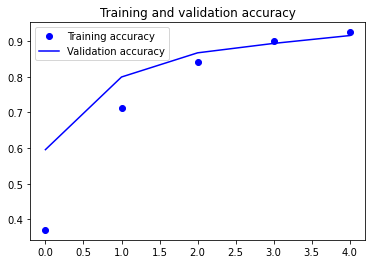

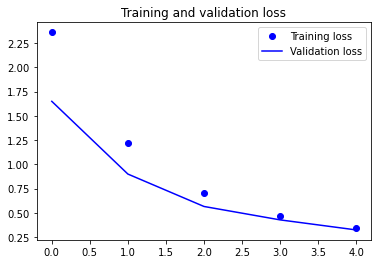

0.001
Train on 10752 samples, validate on 2688 samples
Epoch 1/5
10752/10752 [==============================] - 19s 2ms/sample - loss: 2.3786 - acc: 0.3617 - val_loss: 1.5325 - val_acc: 0.6339
Epoch 2/5
10752/10752 [==============================] - 17s 2ms/sample - loss: 1.1152 - acc: 0.7340 - val_loss: 0.8255 - val_acc: 0.8006
Epoch 3/5
10752/10752 [==============================] - 16s 2ms/sample - loss: 0.6362 - acc: 0.8493 - val_loss: 0.5718 - val_acc: 0.8497
Epoch 4/5
10752/10752 [==============================] - 16s 2ms/sample - loss: 0.4301 - acc: 0.8990 - val_loss: 0.4228 - val_acc: 0.8865
Epoch 5/5
10752/10752 [==============================] - 16s 2ms/sample - loss: 0.3064 - acc: 0.9302 - val_loss: 0.3217 - val_acc: 0.9103


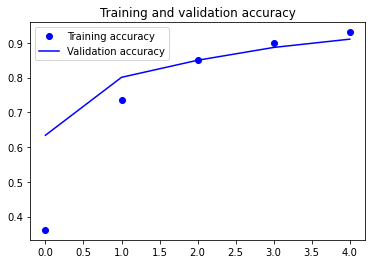

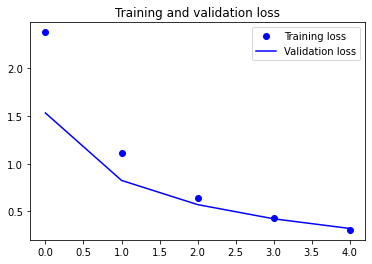

0.1
Train on 10752 samples, validate on 2688 samples
Epoch 1/5
10752/10752 [==============================] - 19s 2ms/sample - loss: 2.0397 - acc: 0.4208 - val_loss: 1.2456 - val_acc: 0.6481
Epoch 2/5
10752/10752 [==============================] - 16s 2ms/sample - loss: 0.8988 - acc: 0.7635 - val_loss: 0.6661 - val_acc: 0.8307
Epoch 3/5
10752/10752 [==============================] - 16s 2ms/sample - loss: 0.5175 - acc: 0.8683 - val_loss: 0.4400 - val_acc: 0.8817
Epoch 4/5
10752/10752 [==============================] - 16s 2ms/sample - loss: 0.3428 - acc: 0.9182 - val_loss: 0.3509 - val_acc: 0.9048
Epoch 5/5
10752/10752 [==============================] - 16s 2ms/sample - loss: 0.2458 - acc: 0.9447 - val_loss: 0.3050 - val_acc: 0.9103


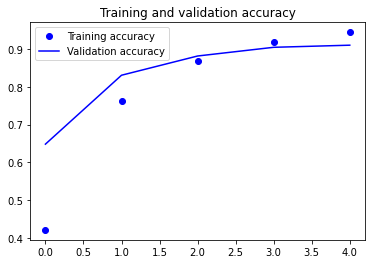

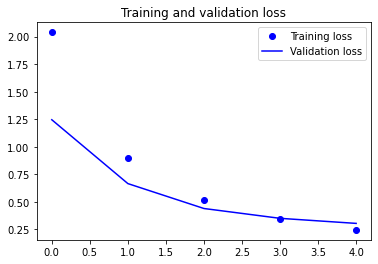

1
Train on 10752 samples, validate on 2688 samples
Epoch 1/5
10752/10752 [==============================] - 19s 2ms/sample - loss: 1.5896 - acc: 0.5264 - val_loss: 0.7195 - val_acc: 0.7783
Epoch 2/5
10752/10752 [==============================] - 16s 2ms/sample - loss: 0.5282 - acc: 0.8467 - val_loss: 0.4154 - val_acc: 0.8787
Epoch 3/5
10752/10752 [==============================] - 16s 2ms/sample - loss: 0.3192 - acc: 0.9115 - val_loss: 0.3622 - val_acc: 0.8865
Epoch 4/5
10752/10752 [==============================] - 16s 2ms/sample - loss: 0.2133 - acc: 0.9446 - val_loss: 0.2831 - val_acc: 0.9141
Epoch 5/5
10752/10752 [==============================] - 16s 2ms/sample - loss: 0.1437 - acc: 0.9657 - val_loss: 0.2445 - val_acc: 0.9215


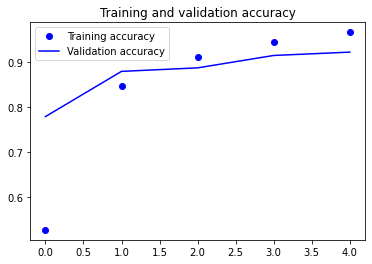

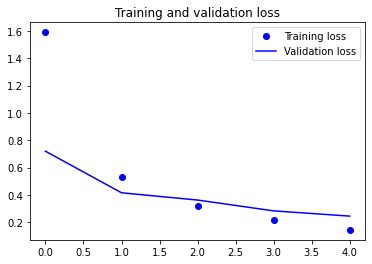

10
Train on 10752 samples, validate on 2688 samples
Epoch 1/5
10752/10752 [==============================] - 19s 2ms/sample - loss: 2.2199 - acc: 0.3841 - val_loss: 1.3696 - val_acc: 0.5368
Epoch 2/5
10752/10752 [==============================] - 16s 2ms/sample - loss: 1.1000 - acc: 0.6369 - val_loss: 1.0035 - val_acc: 0.6451
Epoch 3/5
10752/10752 [==============================] - 16s 2ms/sample - loss: 0.7671 - acc: 0.7388 - val_loss: 0.8168 - val_acc: 0.7042
Epoch 4/5
10752/10752 [==============================] - 16s 2ms/sample - loss: 0.6131 - acc: 0.7835 - val_loss: 0.7498 - val_acc: 0.7533
Epoch 5/5
10752/10752 [==============================] - 16s 2ms/sample - loss: 0.4904 - acc: 0.8310 - val_loss: 0.7357 - val_acc: 0.7612


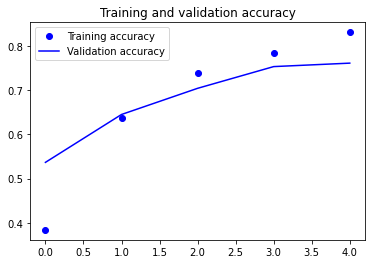

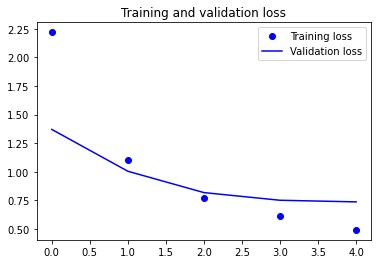

100
Train on 10752 samples, validate on 2688 samples
Epoch 1/5
10752/10752 [==============================] - 19s 2ms/sample - loss: 19.7214 - acc: 0.0334 - val_loss: 3.7271 - val_acc: 0.0324
Epoch 2/5
10752/10752 [==============================] - 16s 2ms/sample - loss: 3.8508 - acc: 0.0353 - val_loss: 4.0670 - val_acc: 0.0361
Epoch 3/5
10752/10752 [==============================] - 16s 2ms/sample - loss: 3.9498 - acc: 0.0334 - val_loss: 3.8677 - val_acc: 0.0402
Epoch 4/5
10752/10752 [==============================] - 16s 2ms/sample - loss: 3.8831 - acc: 0.0349 - val_loss: 4.0369 - val_acc: 0.0357
Epoch 5/5
10752/10752 [==============================] - 16s 2ms/sample - loss: 3.9959 - acc: 0.0390 - val_loss: 4.0364 - val_acc: 0.0298


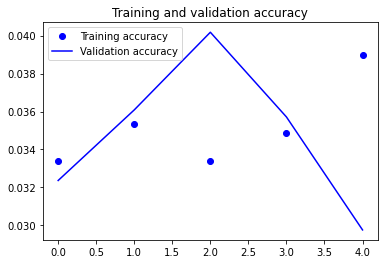

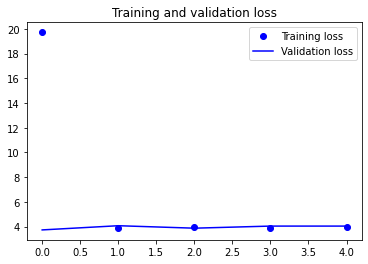

[(0.9151785969734192, 0.0001), (0.910342276096344, 0.001), (0.910342276096344, 0.1), (0.921502947807312, 1), (0.7611607313156128, 10), (0.02976190485060215, 100)]


In [92]:
alpha = [0.0001, 0.001, 0.1, 1, 10, 100]
lst = []
i=0
for elem in range(len(alpha)):
    print(alpha[elem])
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),activation='tanh',input_shape=(32,32,1),padding='same'))
    model.add(LeakyReLU(alpha=alpha[elem]))
    model.add(MaxPooling2D((2, 2),padding='same'))
    model.add(Conv2D(64, (3, 3), activation='tanh',padding='same'))
    model.add(LeakyReLU(alpha=alpha[elem]))
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
    model.add(Conv2D(128, (3, 3), activation='tanh',padding='same'))
    model.add(LeakyReLU(alpha=alpha[elem]))                  
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
    model.add(Flatten())
    model.add(Dense(128, activation='tanh'))
    model.add(LeakyReLU(alpha=alpha[elem]))                  
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

    model_train = model.fit(X_train, y_train, batch_size=batch_size,epochs=5,verbose=1,validation_data=(X_val, y_val))

    model.save("model_train.h5py")

    accuracy = model_train.history['acc']
    val_accuracy = model_train.history['val_acc']
    loss = model_train.history['loss']
    val_loss = model_train.history['val_loss']
    epochs = list(range(len(accuracy)))
    lst.append((val_accuracy[-1], alpha[i]))
    i += 1
    plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()
    
print(lst)

tanh
Train on 10752 samples, validate on 2688 samples
Epoch 1/5
10752/10752 [==============================] - 13s 1ms/sample - loss: 1.5498 - acc: 0.5299 - val_loss: 0.7425 - val_acc: 0.7816
Epoch 2/5
10752/10752 [==============================] - 11s 1ms/sample - loss: 0.5591 - acc: 0.8373 - val_loss: 0.4471 - val_acc: 0.8631
Epoch 3/5
10752/10752 [==============================] - 11s 1ms/sample - loss: 0.3327 - acc: 0.9055 - val_loss: 0.3339 - val_acc: 0.8962
Epoch 4/5
10752/10752 [==============================] - 10s 950us/sample - loss: 0.2105 - acc: 0.9450 - val_loss: 0.3024 - val_acc: 0.8999
Epoch 5/5
10752/10752 [==============================] - 11s 1ms/sample - loss: 0.1498 - acc: 0.9614 - val_loss: 0.2623 - val_acc: 0.9163


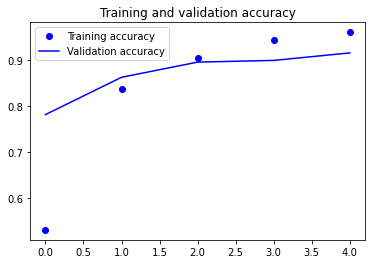

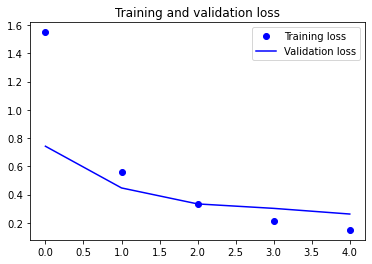

sigmoid
Train on 10752 samples, validate on 2688 samples
Epoch 1/5
10752/10752 [==============================] - 13s 1ms/sample - loss: 3.3614 - acc: 0.0353 - val_loss: 3.3472 - val_acc: 0.0387
Epoch 2/5
10752/10752 [==============================] - 11s 993us/sample - loss: 3.3448 - acc: 0.0350 - val_loss: 3.3411 - val_acc: 0.0346
Epoch 3/5
10752/10752 [==============================] - 11s 1ms/sample - loss: 3.3441 - acc: 0.0354 - val_loss: 3.3381 - val_acc: 0.0320
Epoch 4/5
10752/10752 [==============================] - 10s 924us/sample - loss: 3.3439 - acc: 0.0354 - val_loss: 3.3373 - val_acc: 0.0387
Epoch 5/5
10752/10752 [==============================] - 10s 939us/sample - loss: 3.3435 - acc: 0.0338 - val_loss: 3.3509 - val_acc: 0.0342


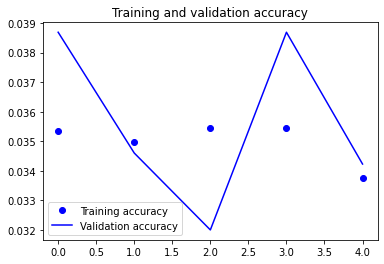

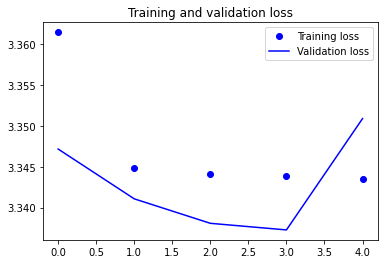

relu
Train on 10752 samples, validate on 2688 samples
Epoch 1/5
10752/10752 [==============================] - 11s 1ms/sample - loss: 1.7771 - acc: 0.4531 - val_loss: 0.8877 - val_acc: 0.7050
Epoch 2/5
10752/10752 [==============================] - 11s 1ms/sample - loss: 0.6402 - acc: 0.7875 - val_loss: 0.5474 - val_acc: 0.8170
Epoch 3/5
10752/10752 [==============================] - 11s 1ms/sample - loss: 0.3793 - acc: 0.8751 - val_loss: 0.4112 - val_acc: 0.8624
Epoch 4/5
10752/10752 [==============================] - 11s 1ms/sample - loss: 0.2674 - acc: 0.9090 - val_loss: 0.3063 - val_acc: 0.8943
Epoch 5/5
10752/10752 [==============================] - 12s 1ms/sample - loss: 0.1939 - acc: 0.9369 - val_loss: 0.3294 - val_acc: 0.8906


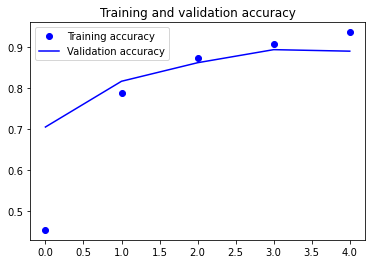

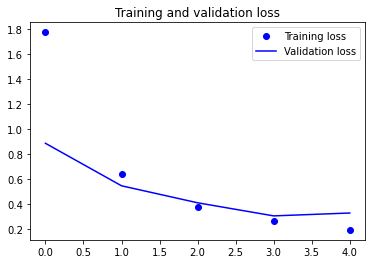

linear
Train on 10752 samples, validate on 2688 samples
Epoch 1/5
10752/10752 [==============================] - 12s 1ms/sample - loss: 1.5077 - acc: 0.5392 - val_loss: 0.6978 - val_acc: 0.7682
Epoch 2/5
10752/10752 [==============================] - 10s 925us/sample - loss: 0.5178 - acc: 0.8324 - val_loss: 0.4248 - val_acc: 0.8516
Epoch 3/5
10752/10752 [==============================] - 10s 959us/sample - loss: 0.3163 - acc: 0.8943 - val_loss: 0.4019 - val_acc: 0.8679
Epoch 4/5
10752/10752 [==============================] - 10s 907us/sample - loss: 0.2198 - acc: 0.9259 - val_loss: 0.3589 - val_acc: 0.8802
Epoch 5/5
10752/10752 [==============================] - 10s 942us/sample - loss: 0.1653 - acc: 0.9449 - val_loss: 0.3431 - val_acc: 0.8917


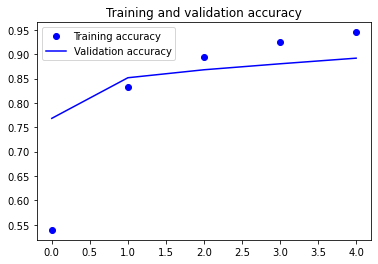

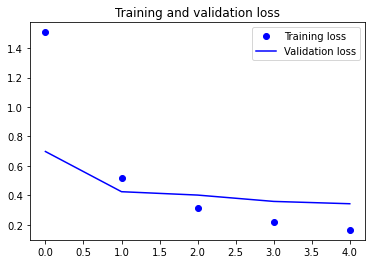

[(0.9162946343421936, 'tanh'), (0.0342261902987957, 'sigmoid'), (0.890625, 'relu'), (0.8917410969734192, 'linear')]


In [61]:
act = ['tanh', 'sigmoid', 'relu', 'linear']
lst = []
i=0
for elem in range(len(act)):
    print(act[elem])
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),activation=act[elem],input_shape=(32,32,1),padding='same'))
    model.add(MaxPooling2D((2, 2),padding='same'))
    model.add(Conv2D(64, (3, 3), activation=act[elem],padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
    model.add(Conv2D(128, (3, 3), activation=act[elem],padding='same'))                 
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
    model.add(Flatten())
    model.add(Dense(128, activation=act[elem]))              
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

    model_train = model.fit(X_train, y_train, batch_size=batch_size,epochs=5,verbose=1,validation_data=(X_val, y_val))

    model.save("model_train.h5py")

    accuracy = model_train.history['acc']
    val_accuracy = model_train.history['val_acc']
    loss = model_train.history['loss']
    val_loss = model_train.history['val_loss']
    epochs = list(range(len(accuracy)))
    lst.append((val_accuracy[-1], act[i]))
    i += 1
    plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

print(lst)

(0.0001, 'tanh')
Train on 10752 samples, validate on 2688 samples
Epoch 1/5
10752/10752 [==============================] - 13s 1ms/sample - loss: 1.5705 - acc: 0.5330 - val_loss: 0.7131 - val_acc: 0.7816
Epoch 2/5
10752/10752 [==============================] - 11s 996us/sample - loss: 0.5470 - acc: 0.8451 - val_loss: 0.4248 - val_acc: 0.8791
Epoch 3/5
10752/10752 [==============================] - 11s 978us/sample - loss: 0.3378 - acc: 0.9107 - val_loss: 0.3636 - val_acc: 0.8936
Epoch 4/5
10752/10752 [==============================] - 12s 1ms/sample - loss: 0.2362 - acc: 0.9456 - val_loss: 0.3003 - val_acc: 0.9103
Epoch 5/5
10752/10752 [==============================] - 11s 1ms/sample - loss: 0.1739 - acc: 0.9620 - val_loss: 0.2640 - val_acc: 0.9263


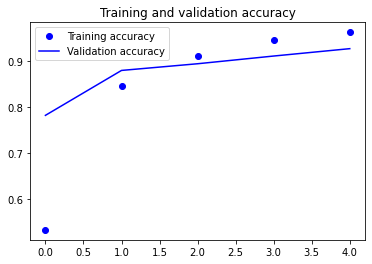

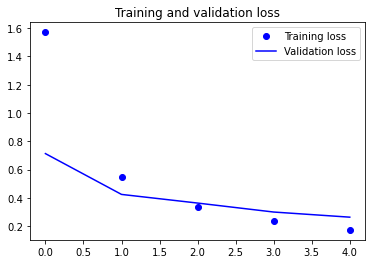

(0.001, 'tanh')
Train on 10752 samples, validate on 2688 samples
Epoch 1/5
10752/10752 [==============================] - 14s 1ms/sample - loss: 1.7579 - acc: 0.5164 - val_loss: 0.8585 - val_acc: 0.8006
Epoch 2/5
10752/10752 [==============================] - 11s 1ms/sample - loss: 0.6947 - acc: 0.8376 - val_loss: 0.5754 - val_acc: 0.8683
Epoch 3/5
10752/10752 [==============================] - 11s 1ms/sample - loss: 0.4710 - acc: 0.9087 - val_loss: 0.4546 - val_acc: 0.9111
Epoch 4/5
10752/10752 [==============================] - 12s 1ms/sample - loss: 0.3687 - acc: 0.9348 - val_loss: 0.3955 - val_acc: 0.9156
Epoch 5/5
10752/10752 [==============================] - 12s 1ms/sample - loss: 0.2959 - acc: 0.9556 - val_loss: 0.3783 - val_acc: 0.9193


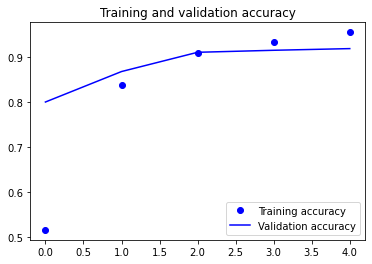

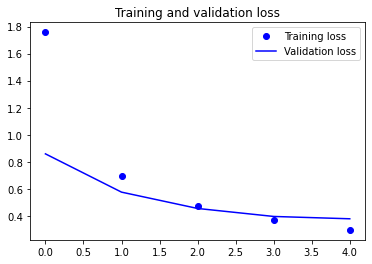

(0.1, 'tanh')
Train on 10752 samples, validate on 2688 samples
Epoch 1/5
10752/10752 [==============================] - 13s 1ms/sample - loss: 3.8299 - acc: 0.3384 - val_loss: 1.8452 - val_acc: 0.4814
Epoch 2/5
10752/10752 [==============================] - 11s 999us/sample - loss: 1.6910 - acc: 0.5399 - val_loss: 1.5019 - val_acc: 0.6012
Epoch 3/5
10752/10752 [==============================] - 11s 1ms/sample - loss: 1.4136 - acc: 0.6302 - val_loss: 1.3825 - val_acc: 0.6231
Epoch 4/5
10752/10752 [==============================] - 11s 1ms/sample - loss: 1.2428 - acc: 0.6897 - val_loss: 1.2437 - val_acc: 0.6908
Epoch 5/5
10752/10752 [==============================] - 12s 1ms/sample - loss: 1.1115 - acc: 0.7255 - val_loss: 1.1448 - val_acc: 0.7124


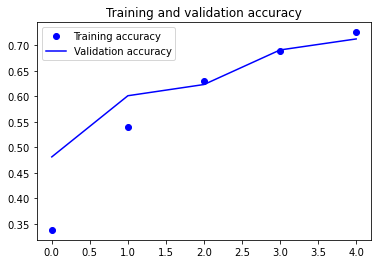

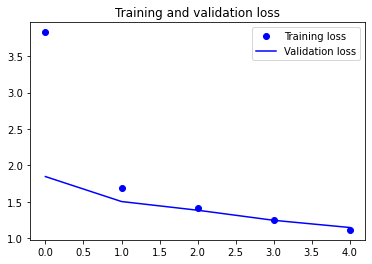

(1, 'tanh')
Train on 10752 samples, validate on 2688 samples
Epoch 1/5
10752/10752 [==============================] - 13s 1ms/sample - loss: 17.1018 - acc: 0.2562 - val_loss: 2.2393 - val_acc: 0.3765
Epoch 2/5
10752/10752 [==============================] - 11s 998us/sample - loss: 2.1428 - acc: 0.4134 - val_loss: 2.0661 - val_acc: 0.4208
Epoch 3/5
10752/10752 [==============================] - 11s 1ms/sample - loss: 1.9437 - acc: 0.4726 - val_loss: 1.8281 - val_acc: 0.5186
Epoch 4/5
10752/10752 [==============================] - 12s 1ms/sample - loss: 1.8204 - acc: 0.5054 - val_loss: 1.7797 - val_acc: 0.5294
Epoch 5/5
10752/10752 [==============================] - 12s 1ms/sample - loss: 1.7142 - acc: 0.5414 - val_loss: 1.6078 - val_acc: 0.5815


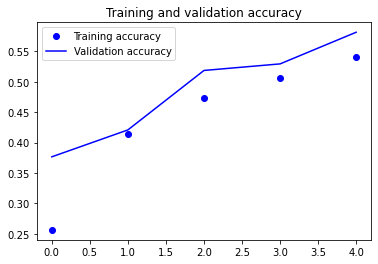

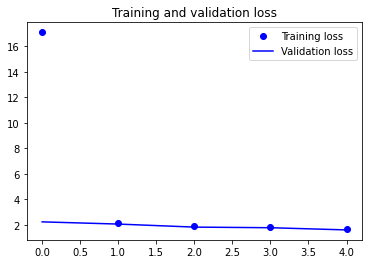

(10, 'tanh')
Train on 10752 samples, validate on 2688 samples
Epoch 1/5
10752/10752 [==============================] - 14s 1ms/sample - loss: 147.0054 - acc: 0.0805 - val_loss: 3.3414 - val_acc: 0.0353
Epoch 2/5
10752/10752 [==============================] - 11s 1ms/sample - loss: 3.3353 - acc: 0.0336 - val_loss: 3.3337 - val_acc: 0.0353
Epoch 3/5
10752/10752 [==============================] - 11s 1ms/sample - loss: 3.3342 - acc: 0.0354 - val_loss: 3.3335 - val_acc: 0.0417
Epoch 4/5
10752/10752 [==============================] - 11s 1ms/sample - loss: 3.3347 - acc: 0.0369 - val_loss: 3.3333 - val_acc: 0.0387
Epoch 5/5
10752/10752 [==============================] - 11s 1ms/sample - loss: 3.3344 - acc: 0.0348 - val_loss: 3.3364 - val_acc: 0.0320


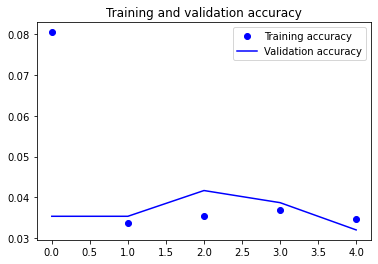

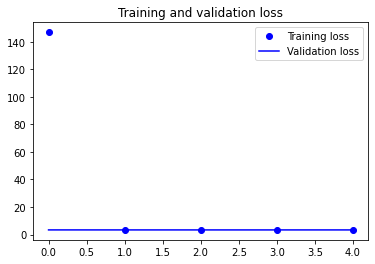

(100, 'tanh')
Train on 10752 samples, validate on 2688 samples
Epoch 1/5
10752/10752 [==============================] - 14s 1ms/sample - loss: 1440.8856 - acc: 0.0765 - val_loss: 3.3874 - val_acc: 0.0353
Epoch 2/5
10752/10752 [==============================] - 11s 1ms/sample - loss: 3.3367 - acc: 0.0363 - val_loss: 3.3341 - val_acc: 0.0324
Epoch 3/5
10752/10752 [==============================] - 12s 1ms/sample - loss: 3.3344 - acc: 0.0366 - val_loss: 3.3344 - val_acc: 0.0350
Epoch 4/5
10752/10752 [==============================] - 12s 1ms/sample - loss: 3.3342 - acc: 0.0354 - val_loss: 3.3343 - val_acc: 0.0350
Epoch 5/5
10752/10752 [==============================] - 12s 1ms/sample - loss: 3.3345 - acc: 0.0358 - val_loss: 3.3375 - val_acc: 0.0298


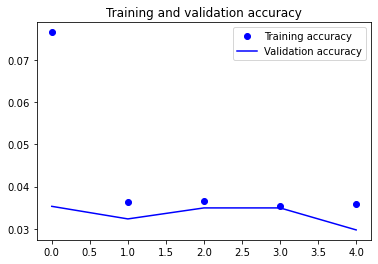

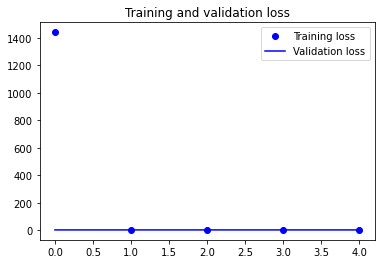

(0.0001, 'sigmoid')
Train on 10752 samples, validate on 2688 samples
Epoch 1/5
10752/10752 [==============================] - 15s 1ms/sample - loss: 3.3683 - acc: 0.0351 - val_loss: 3.3509 - val_acc: 0.0387
Epoch 2/5
10752/10752 [==============================] - 12s 1ms/sample - loss: 3.3490 - acc: 0.0303 - val_loss: 3.3431 - val_acc: 0.0379
Epoch 3/5
10752/10752 [==============================] - 12s 1ms/sample - loss: 3.3442 - acc: 0.0324 - val_loss: 3.3423 - val_acc: 0.0346
Epoch 4/5
10752/10752 [==============================] - 11s 1ms/sample - loss: 3.3415 - acc: 0.0354 - val_loss: 3.3475 - val_acc: 0.0290
Epoch 5/5
10752/10752 [==============================] - 12s 1ms/sample - loss: 3.3416 - acc: 0.0344 - val_loss: 3.3410 - val_acc: 0.0298


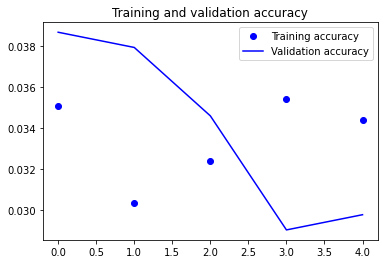

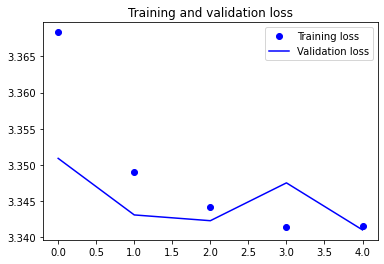

(0.001, 'sigmoid')
Train on 10752 samples, validate on 2688 samples
Epoch 1/5
10752/10752 [==============================] - 14s 1ms/sample - loss: 3.4064 - acc: 0.0301 - val_loss: 3.3488 - val_acc: 0.0298
Epoch 2/5
10752/10752 [==============================] - 13s 1ms/sample - loss: 3.3426 - acc: 0.0324 - val_loss: 3.3391 - val_acc: 0.0342
Epoch 3/5
10752/10752 [==============================] - 12s 1ms/sample - loss: 3.3393 - acc: 0.0345 - val_loss: 3.3378 - val_acc: 0.0361
Epoch 4/5
10752/10752 [==============================] - 12s 1ms/sample - loss: 3.3401 - acc: 0.0329 - val_loss: 3.3391 - val_acc: 0.0342
Epoch 5/5
10752/10752 [==============================] - 12s 1ms/sample - loss: 3.3384 - acc: 0.0348 - val_loss: 3.3382 - val_acc: 0.0387


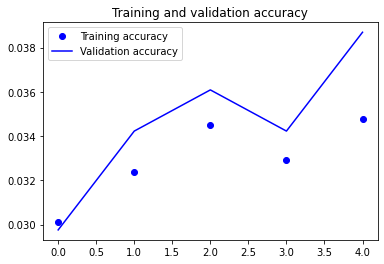

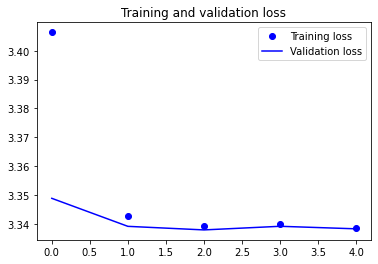

(0.1, 'sigmoid')
Train on 10752 samples, validate on 2688 samples
Epoch 1/5
10752/10752 [==============================] - 14s 1ms/sample - loss: 4.7930 - acc: 0.0368 - val_loss: 3.3375 - val_acc: 0.0394
Epoch 2/5
10752/10752 [==============================] - 12s 1ms/sample - loss: 3.3410 - acc: 0.0335 - val_loss: 3.3358 - val_acc: 0.0350
Epoch 3/5
10752/10752 [==============================] - 11s 1ms/sample - loss: 3.3416 - acc: 0.0326 - val_loss: 3.3368 - val_acc: 0.0417
Epoch 4/5
10752/10752 [==============================] - 13s 1ms/sample - loss: 3.3404 - acc: 0.0366 - val_loss: 3.3414 - val_acc: 0.0339
Epoch 5/5
10752/10752 [==============================] - 12s 1ms/sample - loss: 3.3403 - acc: 0.0314 - val_loss: 3.3371 - val_acc: 0.0417


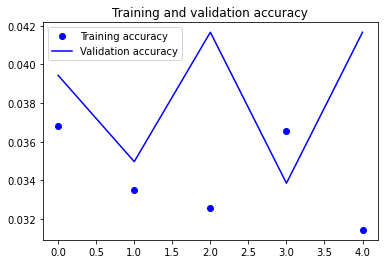

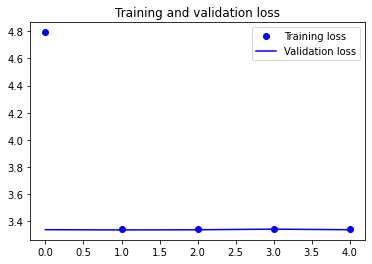

(1, 'sigmoid')
Train on 10752 samples, validate on 2688 samples
Epoch 1/5
10752/10752 [==============================] - 15s 1ms/sample - loss: 17.6732 - acc: 0.0351 - val_loss: 3.3419 - val_acc: 0.0350
Epoch 2/5
10752/10752 [==============================] - 12s 1ms/sample - loss: 3.3396 - acc: 0.0333 - val_loss: 3.3351 - val_acc: 0.0339
Epoch 3/5
10752/10752 [==============================] - 12s 1ms/sample - loss: 3.3387 - acc: 0.0344 - val_loss: 3.3357 - val_acc: 0.0327
Epoch 4/5
10752/10752 [==============================] - 13s 1ms/sample - loss: 3.3382 - acc: 0.0342 - val_loss: 3.3408 - val_acc: 0.0339
Epoch 5/5
10752/10752 [==============================] - 13s 1ms/sample - loss: 3.3392 - acc: 0.0362 - val_loss: 3.3378 - val_acc: 0.0357


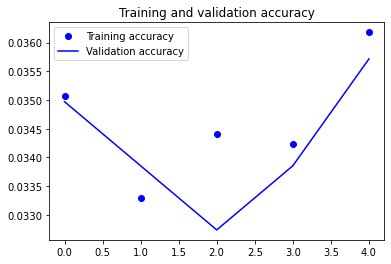

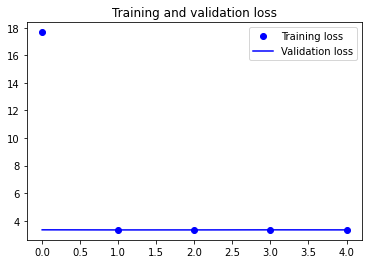

(10, 'sigmoid')
Train on 10752 samples, validate on 2688 samples
Epoch 1/5
10752/10752 [==============================] - 15s 1ms/sample - loss: 146.5610 - acc: 0.0354 - val_loss: 3.3501 - val_acc: 0.0394
Epoch 2/5
10752/10752 [==============================] - 13s 1ms/sample - loss: 3.3413 - acc: 0.0358 - val_loss: 3.3396 - val_acc: 0.0320
Epoch 3/5
10752/10752 [==============================] - 13s 1ms/sample - loss: 3.3405 - acc: 0.0325 - val_loss: 3.3360 - val_acc: 0.0402
Epoch 4/5
10752/10752 [==============================] - 13s 1ms/sample - loss: 3.3392 - acc: 0.0365 - val_loss: 3.3377 - val_acc: 0.0353
Epoch 5/5
10752/10752 [==============================] - 13s 1ms/sample - loss: 3.3389 - acc: 0.0352 - val_loss: 3.3427 - val_acc: 0.0379


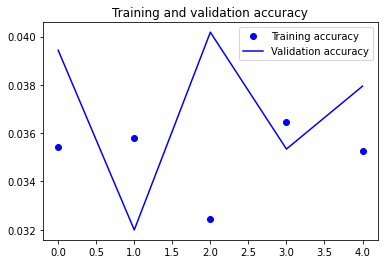

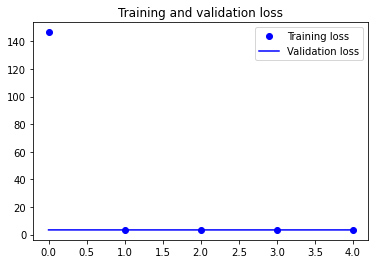

(100, 'sigmoid')
Train on 10752 samples, validate on 2688 samples
Epoch 1/5
10752/10752 [==============================] - 15s 1ms/sample - loss: 1441.4096 - acc: 0.0364 - val_loss: 3.3979 - val_acc: 0.0402
Epoch 2/5
10752/10752 [==============================] - 13s 1ms/sample - loss: 3.3443 - acc: 0.0329 - val_loss: 3.3453 - val_acc: 0.0346
Epoch 3/5
10752/10752 [==============================] - 13s 1ms/sample - loss: 3.3417 - acc: 0.0351 - val_loss: 3.3433 - val_acc: 0.0339
Epoch 4/5
10752/10752 [==============================] - 13s 1ms/sample - loss: 3.3405 - acc: 0.0366 - val_loss: 3.3425 - val_acc: 0.0394
Epoch 5/5
10752/10752 [==============================] - 12s 1ms/sample - loss: 3.3396 - acc: 0.0384 - val_loss: 3.3457 - val_acc: 0.0335


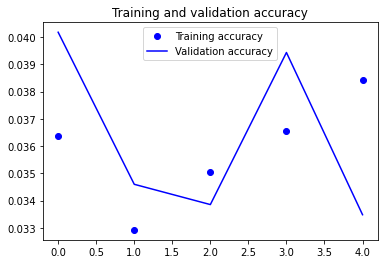

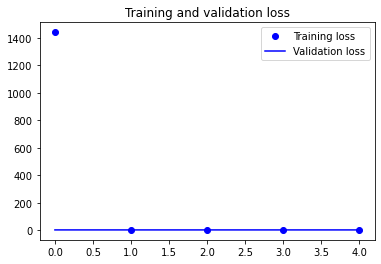

(0.0001, 'relu')
Train on 10752 samples, validate on 2688 samples
Epoch 1/5
10752/10752 [==============================] - 14s 1ms/sample - loss: 1.7592 - acc: 0.4710 - val_loss: 0.8372 - val_acc: 0.7314
Epoch 2/5
10752/10752 [==============================] - 12s 1ms/sample - loss: 0.6612 - acc: 0.7871 - val_loss: 0.5184 - val_acc: 0.8359
Epoch 3/5
10752/10752 [==============================] - 12s 1ms/sample - loss: 0.4153 - acc: 0.8661 - val_loss: 0.4874 - val_acc: 0.8478
Epoch 4/5
10752/10752 [==============================] - 12s 1ms/sample - loss: 0.3125 - acc: 0.9047 - val_loss: 0.4025 - val_acc: 0.8757
Epoch 5/5
10752/10752 [==============================] - 12s 1ms/sample - loss: 0.2391 - acc: 0.9291 - val_loss: 0.3571 - val_acc: 0.8873


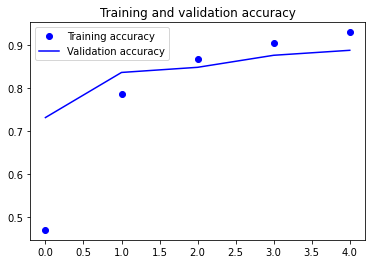

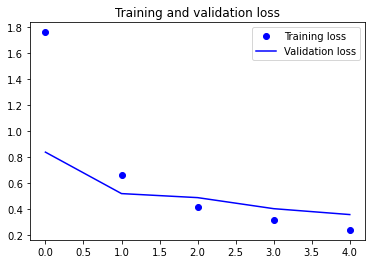

(0.001, 'relu')
Train on 10752 samples, validate on 2688 samples
Epoch 1/5
10752/10752 [==============================] - 14s 1ms/sample - loss: 1.8942 - acc: 0.4495 - val_loss: 0.9462 - val_acc: 0.7292
Epoch 2/5
10752/10752 [==============================] - 12s 1ms/sample - loss: 0.8009 - acc: 0.7759 - val_loss: 0.7112 - val_acc: 0.7950
Epoch 3/5
10752/10752 [==============================] - 12s 1ms/sample - loss: 0.5768 - acc: 0.8495 - val_loss: 0.5791 - val_acc: 0.8493
Epoch 4/5
10752/10752 [==============================] - 11s 1ms/sample - loss: 0.4707 - acc: 0.8843 - val_loss: 0.4540 - val_acc: 0.8880
Epoch 5/5
10752/10752 [==============================] - 12s 1ms/sample - loss: 0.3701 - acc: 0.9186 - val_loss: 0.4789 - val_acc: 0.8761


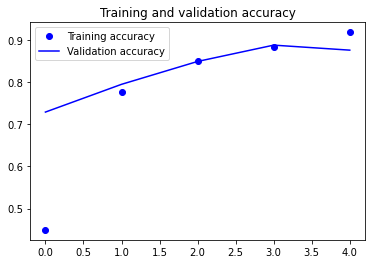

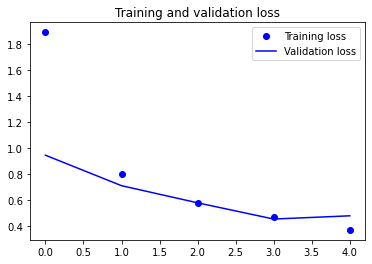

(0.1, 'relu')
Train on 10752 samples, validate on 2688 samples
Epoch 1/5
10752/10752 [==============================] - 14s 1ms/sample - loss: 3.9415 - acc: 0.3144 - val_loss: 1.8352 - val_acc: 0.4970
Epoch 2/5
10752/10752 [==============================] - 11s 1ms/sample - loss: 1.6277 - acc: 0.5541 - val_loss: 1.3857 - val_acc: 0.6176
Epoch 3/5
10752/10752 [==============================] - 12s 1ms/sample - loss: 1.2564 - acc: 0.6631 - val_loss: 1.1004 - val_acc: 0.7094
Epoch 4/5
10752/10752 [==============================] - 12s 1ms/sample - loss: 1.0725 - acc: 0.7121 - val_loss: 1.0050 - val_acc: 0.7414
Epoch 5/5
10752/10752 [==============================] - 12s 1ms/sample - loss: 0.9536 - acc: 0.7554 - val_loss: 0.9776 - val_acc: 0.7474


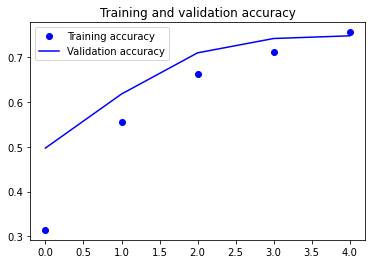

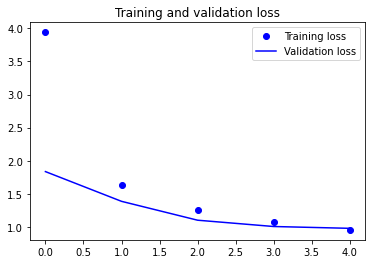

(1, 'relu')
Train on 10752 samples, validate on 2688 samples
Epoch 1/5
10752/10752 [==============================] - 14s 1ms/sample - loss: 17.2698 - acc: 0.1908 - val_loss: 2.3025 - val_acc: 0.3683
Epoch 2/5
10752/10752 [==============================] - 12s 1ms/sample - loss: 2.1953 - acc: 0.3757 - val_loss: 2.0436 - val_acc: 0.4211
Epoch 3/5
10752/10752 [==============================] - 12s 1ms/sample - loss: 1.9496 - acc: 0.4459 - val_loss: 1.8409 - val_acc: 0.4844
Epoch 4/5
10752/10752 [==============================] - 12s 1ms/sample - loss: 1.7630 - acc: 0.5034 - val_loss: 1.6636 - val_acc: 0.5469
Epoch 5/5
10752/10752 [==============================] - 12s 1ms/sample - loss: 1.6253 - acc: 0.5474 - val_loss: 1.5132 - val_acc: 0.5796


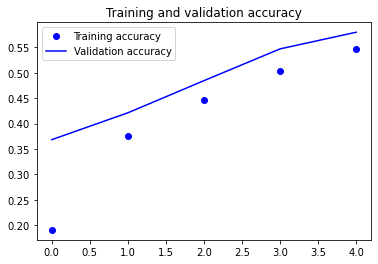

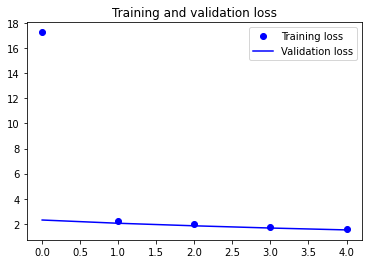

(10, 'relu')
Train on 10752 samples, validate on 2688 samples
Epoch 1/5
10752/10752 [==============================] - 15s 1ms/sample - loss: 146.3172 - acc: 0.0501 - val_loss: 3.3380 - val_acc: 0.0327
Epoch 2/5
10752/10752 [==============================] - 13s 1ms/sample - loss: 3.3329 - acc: 0.0345 - val_loss: 3.3334 - val_acc: 0.0290
Epoch 3/5
10752/10752 [==============================] - 11s 1ms/sample - loss: 3.3325 - acc: 0.0329 - val_loss: 3.3335 - val_acc: 0.0298
Epoch 4/5
10752/10752 [==============================] - 12s 1ms/sample - loss: 3.3324 - acc: 0.0375 - val_loss: 3.3337 - val_acc: 0.0290
Epoch 5/5
10752/10752 [==============================] - 12s 1ms/sample - loss: 3.3324 - acc: 0.0365 - val_loss: 3.3337 - val_acc: 0.0290


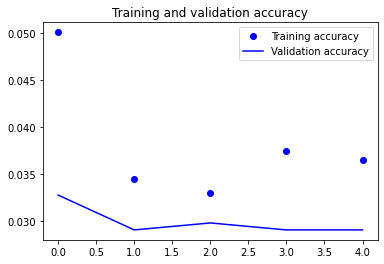

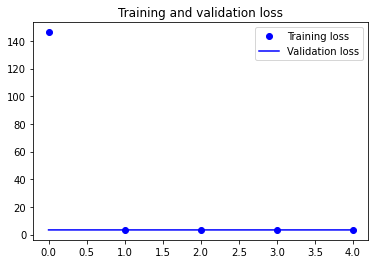

(100, 'relu')
Train on 10752 samples, validate on 2688 samples
Epoch 1/5
10752/10752 [==============================] - 13s 1ms/sample - loss: 1430.4143 - acc: 0.0454 - val_loss: 3.3831 - val_acc: 0.0346
Epoch 2/5
10752/10752 [==============================] - 12s 1ms/sample - loss: 3.3353 - acc: 0.0364 - val_loss: 3.3334 - val_acc: 0.0290
Epoch 3/5
10752/10752 [==============================] - 12s 1ms/sample - loss: 3.3325 - acc: 0.0352 - val_loss: 3.3337 - val_acc: 0.0298
Epoch 4/5
10752/10752 [==============================] - 12s 1ms/sample - loss: 3.3324 - acc: 0.0360 - val_loss: 3.3338 - val_acc: 0.0298
Epoch 5/5
10752/10752 [==============================] - 12s 1ms/sample - loss: 3.3324 - acc: 0.0350 - val_loss: 3.3340 - val_acc: 0.0290


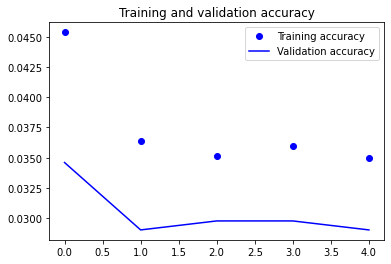

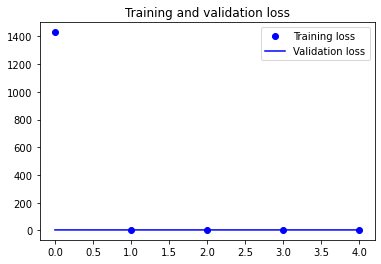

(0.0001, 'linear')
Train on 10752 samples, validate on 2688 samples
Epoch 1/5
10752/10752 [==============================] - 15s 1ms/sample - loss: 1.4932 - acc: 0.5470 - val_loss: 0.6407 - val_acc: 0.8017
Epoch 2/5
10752/10752 [==============================] - 12s 1ms/sample - loss: 0.5082 - acc: 0.8408 - val_loss: 0.4355 - val_acc: 0.8638
Epoch 3/5
10752/10752 [==============================] - 11s 1ms/sample - loss: 0.3236 - acc: 0.8998 - val_loss: 0.3928 - val_acc: 0.8765
Epoch 4/5
10752/10752 [==============================] - 12s 1ms/sample - loss: 0.2367 - acc: 0.9299 - val_loss: 0.3163 - val_acc: 0.9055
Epoch 5/5
10752/10752 [==============================] - 14s 1ms/sample - loss: 0.1786 - acc: 0.9502 - val_loss: 0.3186 - val_acc: 0.9010


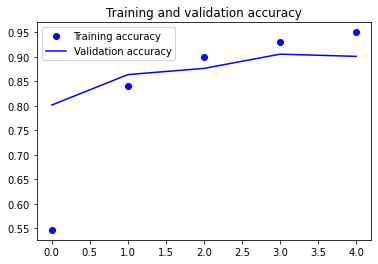

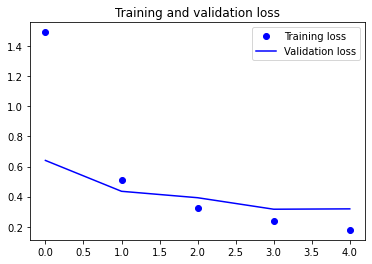

(0.001, 'linear')
Train on 10752 samples, validate on 2688 samples
Epoch 1/5
10752/10752 [==============================] - 14s 1ms/sample - loss: 1.6008 - acc: 0.5439 - val_loss: 0.7785 - val_acc: 0.7932
Epoch 2/5
10752/10752 [==============================] - 12s 1ms/sample - loss: 0.6568 - acc: 0.8333 - val_loss: 0.5661 - val_acc: 0.8531
Epoch 3/5
10752/10752 [==============================] - 12s 1ms/sample - loss: 0.4715 - acc: 0.8912 - val_loss: 0.4840 - val_acc: 0.8780
Epoch 4/5
10752/10752 [==============================] - 12s 1ms/sample - loss: 0.3900 - acc: 0.9121 - val_loss: 0.4784 - val_acc: 0.8865
Epoch 5/5
10752/10752 [==============================] - 11s 1ms/sample - loss: 0.3240 - acc: 0.9358 - val_loss: 0.4068 - val_acc: 0.9077


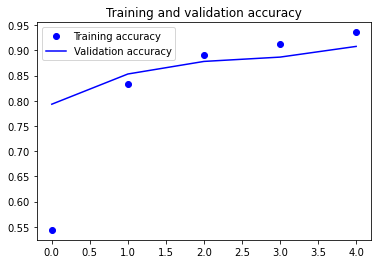

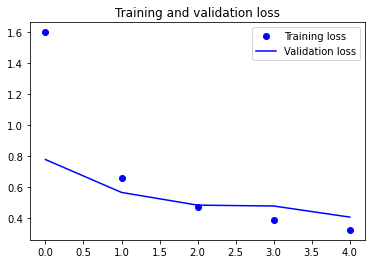

(0.1, 'linear')
Train on 10752 samples, validate on 2688 samples
Epoch 1/5
10752/10752 [==============================] - 14s 1ms/sample - loss: 3.7259 - acc: 0.3635 - val_loss: 1.6595 - val_acc: 0.5569
Epoch 2/5
10752/10752 [==============================] - 11s 1ms/sample - loss: 1.4859 - acc: 0.6118 - val_loss: 1.2513 - val_acc: 0.6920
Epoch 3/5
10752/10752 [==============================] - 11s 998us/sample - loss: 1.2105 - acc: 0.6966 - val_loss: 1.0313 - val_acc: 0.7649
Epoch 4/5
10752/10752 [==============================] - 13s 1ms/sample - loss: 1.0513 - acc: 0.7473 - val_loss: 1.0171 - val_acc: 0.7571
Epoch 5/5
10752/10752 [==============================] - 12s 1ms/sample - loss: 0.9626 - acc: 0.7706 - val_loss: 1.0115 - val_acc: 0.7719


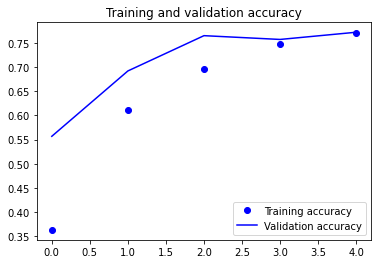

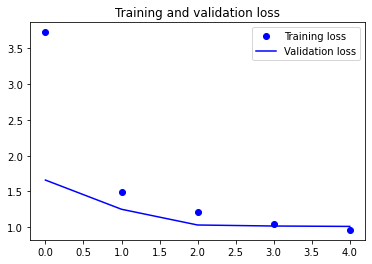

(1, 'linear')
Train on 10752 samples, validate on 2688 samples
Epoch 1/5
10752/10752 [==============================] - 14s 1ms/sample - loss: 17.0885 - acc: 0.2632 - val_loss: 2.1850 - val_acc: 0.3895
Epoch 2/5
10752/10752 [==============================] - 11s 1ms/sample - loss: 2.0880 - acc: 0.4235 - val_loss: 1.9327 - val_acc: 0.4650
Epoch 3/5
10752/10752 [==============================] - 11s 1ms/sample - loss: 1.8596 - acc: 0.4908 - val_loss: 1.7755 - val_acc: 0.5086
Epoch 4/5
10752/10752 [==============================] - 11s 1ms/sample - loss: 1.6986 - acc: 0.5455 - val_loss: 1.5913 - val_acc: 0.5703
Epoch 5/5
10752/10752 [==============================] - 11s 1ms/sample - loss: 1.5977 - acc: 0.5836 - val_loss: 1.5469 - val_acc: 0.6124


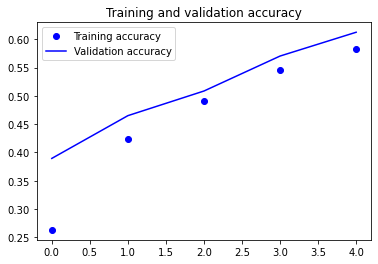

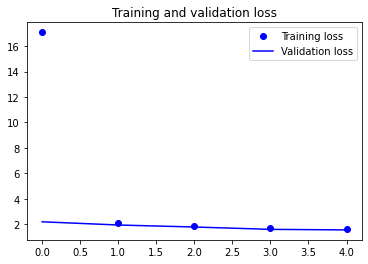

(10, 'linear')
Train on 10752 samples, validate on 2688 samples
Epoch 1/5
10752/10752 [==============================] - 13s 1ms/sample - loss: 146.1205 - acc: 0.0884 - val_loss: 3.3410 - val_acc: 0.0327
Epoch 2/5
10752/10752 [==============================] - 11s 1ms/sample - loss: 3.3354 - acc: 0.0370 - val_loss: 3.3340 - val_acc: 0.0290
Epoch 3/5
10752/10752 [==============================] - 11s 998us/sample - loss: 3.2348 - acc: 0.0918 - val_loss: 2.9211 - val_acc: 0.2050
Epoch 4/5
10752/10752 [==============================] - 11s 1ms/sample - loss: 2.4853 - acc: 0.3096 - val_loss: 2.2914 - val_acc: 0.3497
Epoch 5/5
10752/10752 [==============================] - 11s 1ms/sample - loss: 2.2142 - acc: 0.3780 - val_loss: 2.1424 - val_acc: 0.4010


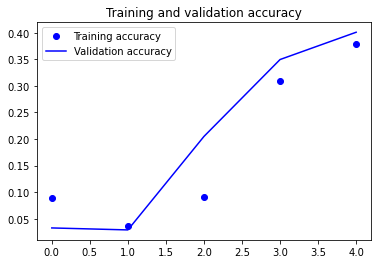

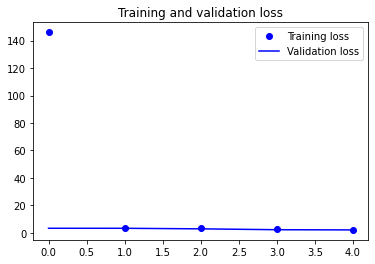

(100, 'linear')
Train on 10752 samples, validate on 2688 samples
Epoch 1/5
10752/10752 [==============================] - 14s 1ms/sample - loss: 1440.1244 - acc: 0.0638 - val_loss: 3.3873 - val_acc: 0.0342
Epoch 2/5
10752/10752 [==============================] - 11s 1ms/sample - loss: 3.3370 - acc: 0.0334 - val_loss: 3.3364 - val_acc: 0.0342
Epoch 3/5
10752/10752 [==============================] - 11s 1ms/sample - loss: 3.3345 - acc: 0.0356 - val_loss: 3.3357 - val_acc: 0.0346
Epoch 4/5
10752/10752 [==============================] - 10s 976us/sample - loss: 3.3345 - acc: 0.0359 - val_loss: 3.3345 - val_acc: 0.0346
Epoch 5/5
10752/10752 [==============================] - 12s 1ms/sample - loss: 3.3345 - acc: 0.0365 - val_loss: 3.3350 - val_acc: 0.0342


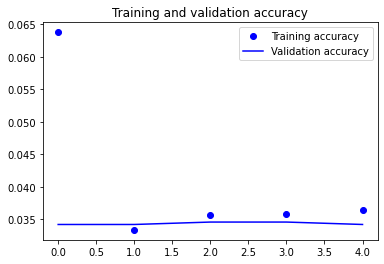

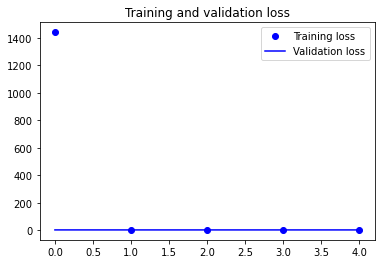

In [70]:
l2 = [0.0001, 0.001, 0.1, 1, 10, 100]
act = ['tanh', 'sigmoid', 'relu', 'linear']
lst = []
i = 0
for j in act:
    for elem in range(len(l2)):
        print((l2[elem], j))
        model = Sequential()
        model.add(Convacc2D(32, kernel_size=(3, 3),activation=j,input_shape=(32,32,1),padding='same'))
        model.add(MaxPooling2D((2, 2),padding='same'))
        model.add(Conv2D(64, (3, 3), activation=j,padding='same', kernel_regularizer =tf.keras.regularizers.l2( l=l2[elem])))
        model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
        model.add(Conv2D(128, (3, 3), activation=j,padding='same', kernel_regularizer =tf.keras.regularizers.l2( l=l2[elem])))                 
        model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
        model.add(Flatten())
        model.add(Dense(128, activation=j))              
        model.add(Dense(num_classes, activation='softmax'))

        model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

        model_train = model.fit(X_train, y_train, batch_size=batch_size,epochs=5,verbose=1,validation_data=(X_val, y_val))

        model.save("model_train.h5py")

        accuracy = model_train.history['acc']
        val_accuracy = model_train.history['val_acc']
        loss = model_train.history['loss']
        val_loss = model_train.history['val_loss']
        epochs = list(range(len(accuracy)))
        plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
        plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
        plt.title('Training and validation accuracy')
        plt.legend()
        plt.figure()
        plt.plot(epochs, loss, 'bo', label='Training loss')
        plt.plot(epochs, val_loss, 'b', label='Validation loss')
        plt.title('Training and validation loss')
        plt.legend()
        plt.show()

Train on 10752 samples, validate on 2688 samples
Epoch 1/5
10752/10752 [==============================] - 8s 736us/sample - loss: 1.6967 - acc: 0.4801 - val_loss: 0.7792 - val_acc: 0.7403
Epoch 2/5
10752/10752 [==============================] - 8s 737us/sample - loss: 0.6131 - acc: 0.7997 - val_loss: 0.5005 - val_acc: 0.8304
Epoch 3/5
10752/10752 [==============================] - 8s 718us/sample - loss: 0.3847 - acc: 0.8736 - val_loss: 0.3844 - val_acc: 0.8724
Epoch 4/5
10752/10752 [==============================] - 8s 748us/sample - loss: 0.2801 - acc: 0.9092 - val_loss: 0.3577 - val_acc: 0.8798
Epoch 5/5
10752/10752 [==============================] - 8s 730us/sample - loss: 0.2091 - acc: 0.9285 - val_loss: 0.2853 - val_acc: 0.9077


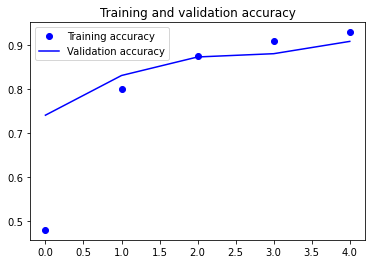

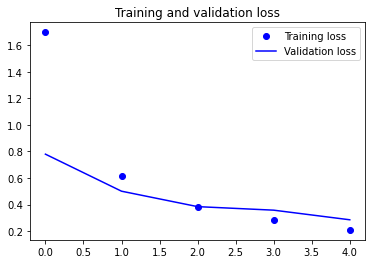

In [54]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(32,32,1),padding='same'))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='linear'))              
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

model_train = model.fit(X_train, y_train, batch_size=batch_size,epochs=5,verbose=1,validation_data=(X_val, y_val))

model.save("model_train.h5py")

accuracy = model_train.history['acc']
val_accuracy = model_train.history['val_acc']
loss = model_train.history['loss']
val_loss = model_train.history['val_loss']
epochs = list(range(len(accuracy)))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Train on 10752 samples, validate on 2688 samples
Epoch 1/5
10752/10752 [==============================] - 8s 715us/sample - loss: 1.8055 - acc: 0.4131 - val_loss: 0.9170 - val_acc: 0.6596
Epoch 2/5
10752/10752 [==============================] - 7s 636us/sample - loss: 0.7738 - acc: 0.7281 - val_loss: 0.6866 - val_acc: 0.7571
Epoch 3/5
10752/10752 [==============================] - 7s 609us/sample - loss: 0.5302 - acc: 0.8145 - val_loss: 0.4488 - val_acc: 0.8493
Epoch 4/5
10752/10752 [==============================] - 7s 635us/sample - loss: 0.3807 - acc: 0.8672 - val_loss: 0.4216 - val_acc: 0.8456
Epoch 5/5
10752/10752 [==============================] - 7s 619us/sample - loss: 0.2913 - acc: 0.8972 - val_loss: 0.3424 - val_acc: 0.8761


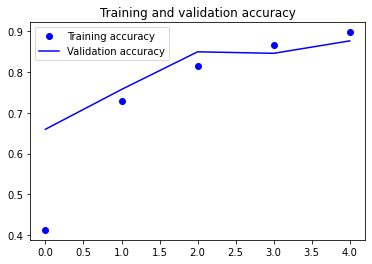

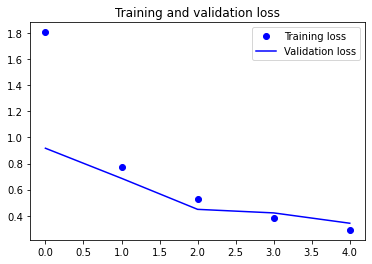

In [57]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(32,32,1),padding='same'))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Conv2D(32, (3, 3), activation='linear',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='linear'))              
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

model_train = model.fit(X_train, y_train, batch_size=batch_size,epochs=5,verbose=1,validation_data=(X_val, y_val))

model.save("model_train.h5py")

accuracy = model_train.history['acc']
val_accuracy = model_train.history['val_acc']
loss = model_train.history['loss']
val_loss = model_train.history['val_loss']
epochs = list(range(len(accuracy)))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Train on 10752 samples, validate on 2688 samples
Epoch 1/5
10752/10752 [==============================] - 8s 721us/sample - loss: 1.9023 - acc: 0.3811 - val_loss: 1.2689 - val_acc: 0.5365
Epoch 2/5
10752/10752 [==============================] - 7s 634us/sample - loss: 0.7771 - acc: 0.7259 - val_loss: 0.5379 - val_acc: 0.8147
Epoch 3/5
10752/10752 [==============================] - 7s 610us/sample - loss: 0.4858 - acc: 0.8318 - val_loss: 0.5081 - val_acc: 0.8065
Epoch 4/5
10752/10752 [==============================] - 7s 616us/sample - loss: 0.3487 - acc: 0.8797 - val_loss: 0.3640 - val_acc: 0.8739
Epoch 5/5
10752/10752 [==============================] - 7s 634us/sample - loss: 0.2817 - acc: 0.9012 - val_loss: 0.3093 - val_acc: 0.8999


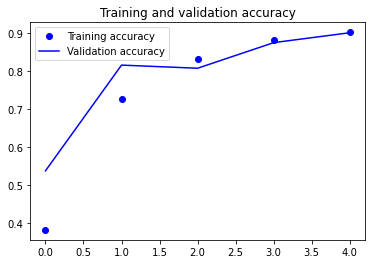

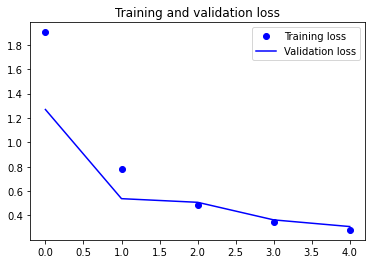

In [52]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(32,32,1),padding='same'))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Conv2D(32, (3, 3), activation='linear',padding='same'))                 
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))                 
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))                 
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))                 
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='linear'))              
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

model_train = model.fit(X_train, y_train, batch_size=batch_size,epochs=5,verbose=1,validation_data=(X_val, y_val))

model.save("model_train.h5py")

accuracy = model_train.history['acc']
val_accuracy = model_train.history['val_acc']
loss = model_train.history['loss']
val_loss = model_train.history['val_loss']
epochs = list(range(len(accuracy)))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Train on 10752 samples, validate on 2688 samples
Epoch 1/5
10752/10752 [==============================] - 14s 1ms/sample - loss: 2.3737 - acc: 0.2855 - val_loss: 1.2005 - val_acc: 0.6540
Epoch 2/5
10752/10752 [==============================] - 13s 1ms/sample - loss: 1.1704 - acc: 0.6120 - val_loss: 0.6483 - val_acc: 0.7958
Epoch 3/5
10752/10752 [==============================] - 12s 1ms/sample - loss: 0.7880 - acc: 0.7349 - val_loss: 0.4455 - val_acc: 0.8605
Epoch 4/5
10752/10752 [==============================] - 12s 1ms/sample - loss: 0.6151 - acc: 0.7966 - val_loss: 0.3477 - val_acc: 0.8873
Epoch 5/5
10752/10752 [==============================] - 12s 1ms/sample - loss: 0.5104 - acc: 0.8287 - val_loss: 0.2941 - val_acc: 0.9040


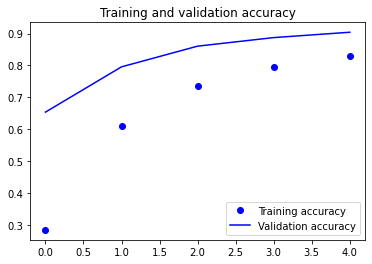

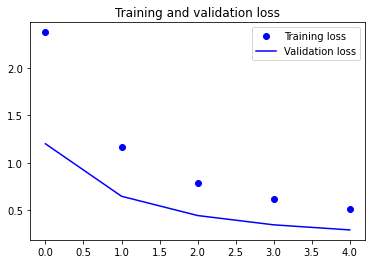

In [68]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(32,32,1),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

model_train = model.fit(X_train, y_train, batch_size=batch_size,epochs=5,verbose=1,validation_data=(X_val, y_val))

model.save("model_train.h5py")

accuracy = model_train.history['acc']
val_accuracy = model_train.history['val_acc']
loss = model_train.history['loss']
val_loss = model_train.history['val_loss']
epochs = list(range(len(accuracy)))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Train on 10752 samples, validate on 2688 samples
Epoch 1/13
10752/10752 [==============================] - ETA: 0s - loss: 1.6512 - acc: 0.5089

D:\anac\lib\site-packages\keras\engine\training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


10752/10752 [==============================] - 66s 6ms/sample - loss: 1.6512 - acc: 0.5089 - val_loss: 0.7912 - val_acc: 0.7701
Epoch 2/13
10752/10752 [==============================] - 54s 5ms/sample - loss: 0.5600 - acc: 0.8352 - val_loss: 0.4507 - val_acc: 0.8690
Epoch 3/13
10752/10752 [==============================] - 17s 2ms/sample - loss: 0.3242 - acc: 0.9084 - val_loss: 0.3081 - val_acc: 0.9051
Epoch 4/13
10752/10752 [==============================] - 17s 2ms/sample - loss: 0.2090 - acc: 0.9474 - val_loss: 0.2760 - val_acc: 0.9163
Epoch 5/13
10752/10752 [==============================] - 18s 2ms/sample - loss: 0.1437 - acc: 0.9655 - val_loss: 0.2503 - val_acc: 0.9193
Epoch 6/13
10752/10752 [==============================] - 22s 2ms/sample - loss: 0.0938 - acc: 0.9831 - val_loss: 0.2098 - val_acc: 0.9360
Epoch 7/13
10752/10752 [==============================] - 17s 2ms/sample - loss: 0.0634 - acc: 0.9887 - val_loss: 0.2200 - val_acc: 0.9297
Epoch 8/13
10752/10752 [==============

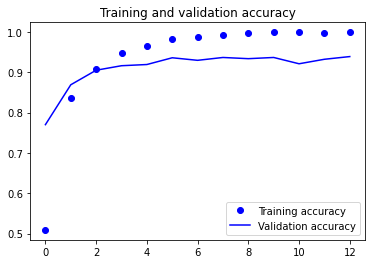

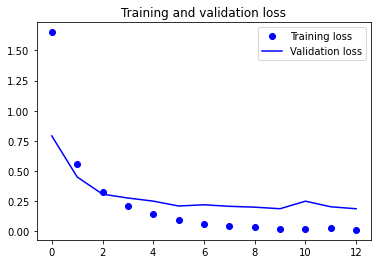

In [105]:
model = Sequential()
# layer 1
model.add(Conv2D(32, kernel_size=(3, 3),activation='tanh',input_shape=(32,32,1),padding='same'))
model.add(MaxPooling2D((2, 2),padding='same'))
# layer 2
model.add(Conv2D(64, (3, 3), activation='tanh',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
# layer 3
model.add(Conv2D(128, (3, 3), activation='tanh',padding='same'))  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Flatten())
# layer 4
model.add(Dense(128, activation='tanh'))
# layer 5
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

model_train = model.fit(X_train, y_train, batch_size=64,epochs=13,verbose=1,validation_data=(X_val, y_val))

model.save("model_train.h5py")

accuracy = model_train.history['acc']
val_accuracy = model_train.history['val_acc']
loss = model_train.history['loss']
val_loss = model_train.history['val_loss']
epochs = list(range(len(accuracy)))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [110]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_true, predictions, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.99      1.00      1.00       120
     Class 1       1.00      0.97      0.98       120
     Class 2       0.87      0.93      0.90       120
     Class 3       0.92      0.89      0.91       120
     Class 4       0.96      0.92      0.94       120
     Class 5       0.90      0.97      0.93       120
     Class 6       0.94      0.95      0.95       120
     Class 7       0.95      0.84      0.89       120
     Class 8       0.83      0.93      0.88       120
     Class 9       0.92      0.97      0.94       120
    Class 10       0.95      0.90      0.92       120
    Class 11       0.98      0.95      0.97       120
    Class 12       0.97      0.94      0.95       120
    Class 13       0.96      0.93      0.94       120
    Class 14       0.93      0.95      0.94       120
    Class 15       0.96      0.95      0.95       120
    Class 16       0.93      0.93      0.93       120
    Class 17       0.96    

In [107]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis = 1)
y_true = np.argmax(y_test, axis = 1)

D:\anac\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


<AxesSubplot:>

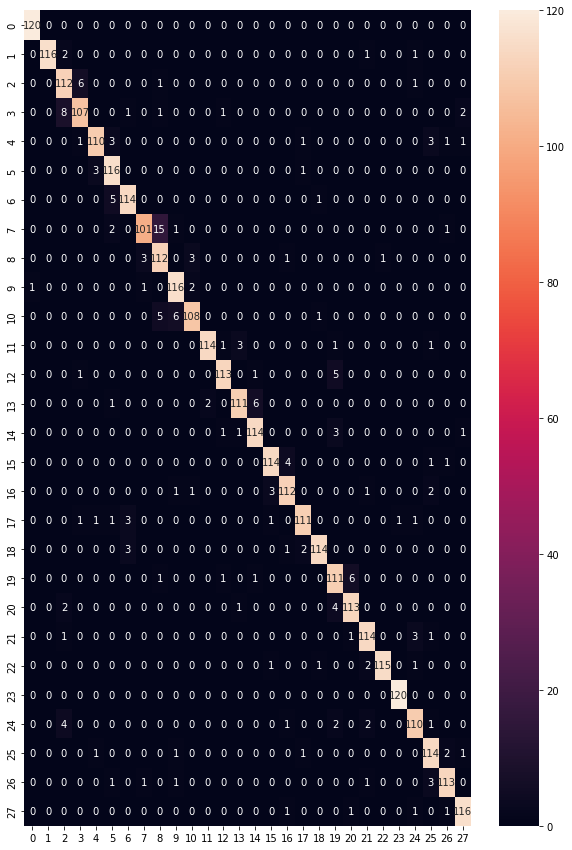

In [108]:
cm = confusion_matrix(y_true, predictions)
plt.figure(figsize=(10,15))
sn.heatmap(cm, annot=True, fmt="d")


In [109]:
accuracy = sum(cm[i][i] for i in range(28)) / y_true.shape[0]
print("accuracy = " + str(accuracy))

accuracy = 0.9407738095238095


In [77]:
test_eval = model.evaluate(X_test, y_test, verbose=1)

print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.25412256588183696
Test accuracy: 0.9276786
